
                    LINEAR REGRESSION REPORT

Target Column (Dependent Variable):
  - Temperature (C)

Feature Columns (Independent Variables):
  - Apparent Temperature (C)
  - Humidity
  - Wind Speed (km/h)
  - Wind Bearing (degrees)
  - Visibility (km)
  - Pressure (millibars)
  - Summary_Breezy and Dry
  - Summary_Breezy and Foggy
  - Summary_Breezy and Mostly Cloudy
  - Summary_Breezy and Overcast
  - Summary_Breezy and Partly Cloudy
  - Summary_Clear
  - Summary_Dangerously Windy and Partly Cloudy
  - Summary_Drizzle
  - Summary_Dry
  - Summary_Dry and Mostly Cloudy
  - Summary_Dry and Partly Cloudy
  - Summary_Foggy
  - Summary_Humid and Mostly Cloudy
  - Summary_Humid and Overcast
  - Summary_Humid and Partly Cloudy
  - Summary_Light Rain
  - Summary_Mostly Cloudy
  - Summary_Overcast
  - Summary_Partly Cloudy
  - Summary_Windy
  - Summary_Windy and Dry
  - Summary_Windy and Foggy
  - Summary_Windy and Mostly Cloudy
  - Summary_Windy and Overcast
  - Summary_Windy and Partly Cl

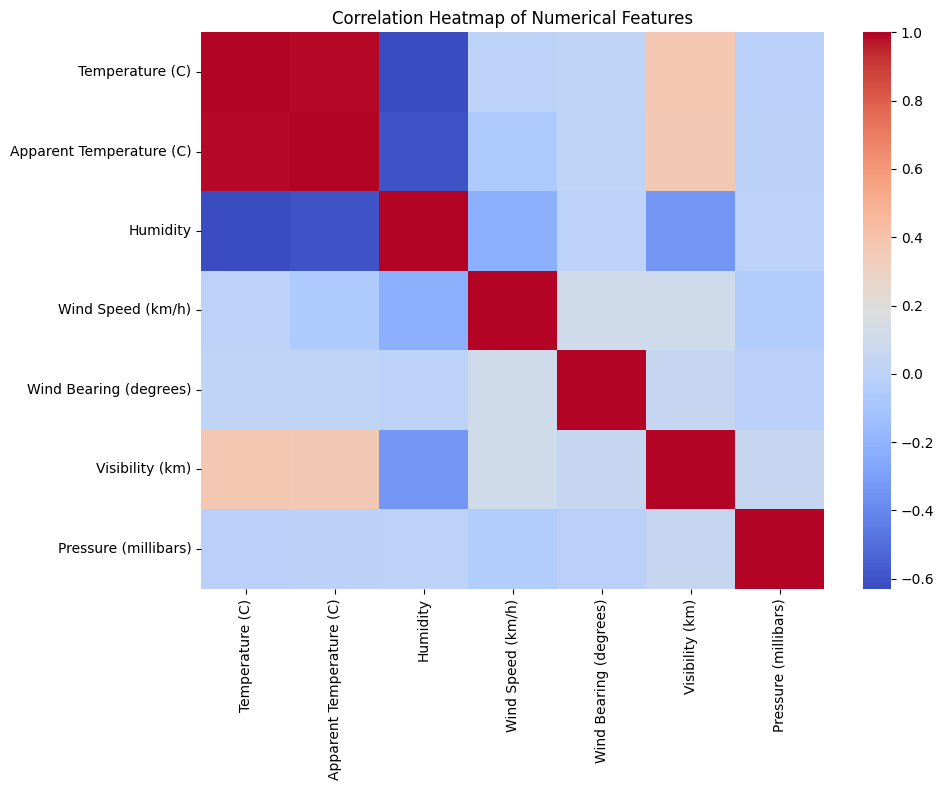

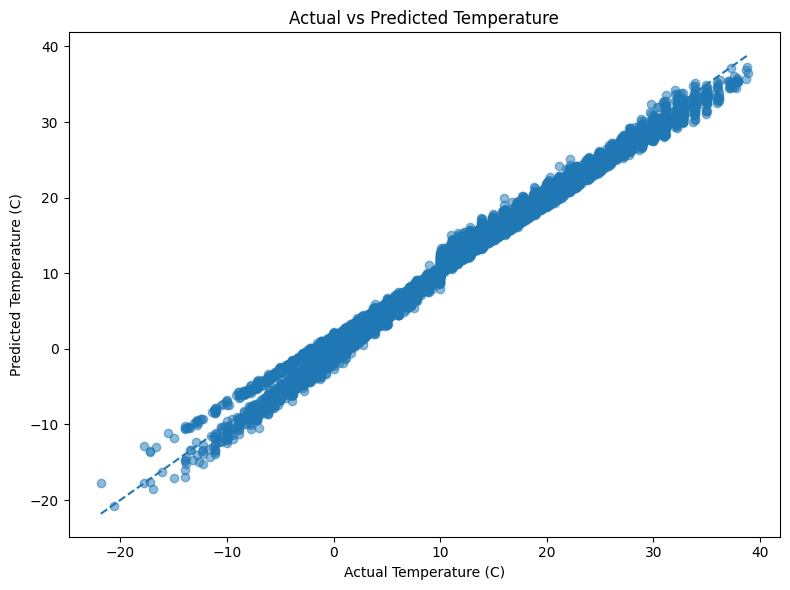

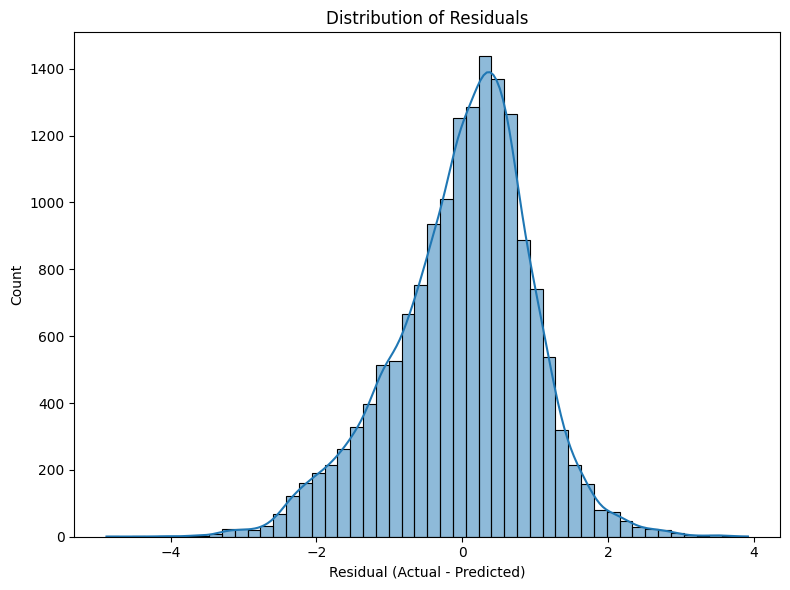

In [ ]:
# ---------------------------------------------
# Linear Regression on weatherHistory.csv
# ---------------------------------------------

# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Show plots inside notebook
%matplotlib inline

# ---------------------------------------------
# 1. LOAD DATA
# ---------------------------------------------
# Make sure 'weatherHistory.csv' is in the current working directory
df = pd.read_csv('weatherHistory.csv')

# Keep track of original data types (before dropping columns)
original_numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
original_categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# ---------------------------------------------
# 2. BASIC CLEANING / PREPROCESSING
# ---------------------------------------------

# Drop rows with missing Precip Type (as required)
df = df.dropna(subset=['Precip Type'])

# Drop columns that are not useful for regression
cols_to_drop = ['Loud Cover', 'Daily Summary', 'Formatted Date']
df = df.drop(columns=cols_to_drop, errors='ignore')  # errors='ignore' to avoid crash if name mismatch

# Drop any remaining rows with missing values (safe for modeling)
df = df.dropna()

# ---------------------------------------------
# 3. ONE-HOT ENCODING FOR CATEGORICAL COLUMNS
# ---------------------------------------------
# Columns to encode
categorical_to_encode = ['Summary', 'Precip Type']

# One-hot encode with drop_first=True to avoid dummy variable trap
df_encoded = pd.get_dummies(df, columns=categorical_to_encode, drop_first=True)

# ---------------------------------------------
# 4. DEFINE TARGET AND FEATURES
# ---------------------------------------------
target_col = 'Temperature (C)'

# Ensure the target column exists
if target_col not in df_encoded.columns:
    raise ValueError(f"Target column '{target_col}' not found in the dataset after preprocessing.")

# Features = all columns except target
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

feature_columns = X.columns.tolist()

# ---------------------------------------------
# 5. TRAIN-TEST SPLIT
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------------
# 6. TRAIN LINEAR REGRESSION MODEL
# ---------------------------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# ---------------------------------------------
# 7. PREDICTIONS & EVALUATION METRICS
# ---------------------------------------------
y_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# ---------------------------------------------
# 8. STRUCTURED TEXT REPORT
# ---------------------------------------------
print("\n" + "=" * 70)
print("                    LINEAR REGRESSION REPORT")
print("=" * 70)

print(f"\nTarget Column (Dependent Variable):\n  - {target_col}")

print("\nFeature Columns (Independent Variables):")
for col in feature_columns:
    print(f"  - {col}")

print("\nOriginal Column Data Types (Before Dropping Any Columns):")
print("\n  Numerical Columns:")
for col in original_numeric_cols:
    print(f"    - {col}")

print("\n  Categorical Columns:")
for col in original_categorical_cols:
    print(f"    - {col}")

print("\nModel Performance on Test Set:")
print(f"  - R² Score: {r2:.4f}")
print(f"  - Mean Squared Error (MSE): {mse:.4f}")
print("=" * 70 + "\n")

# ---------------------------------------------
# 9. VISUALIZATIONS
# ---------------------------------------------

# 9.1 Correlation Heatmap (using numerical features BEFORE one-hot encoding)
# Recreate a numeric-only dataframe from the cleaned (but not encoded) df
numeric_for_corr = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
corr_matrix = numeric_for_corr.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# 9.2 Actual vs Predicted Temperature (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.title('Actual vs Predicted Temperature')

# Add a y=x reference line
min_temp = min(y_test.min(), y_pred.min())
max_temp = max(y_test.max(), y_pred.max())
plt.plot([min_temp, max_temp], [min_temp, max_temp], linestyle='--')
plt.tight_layout()
plt.show()

# 9.3 Residuals Distribution (Histogram)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residual (Actual - Predicted)')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()
